(linalg_eigen)=
# Eigenvalues and eigenvectors

To introduce eigenvalues and eigenvectors, let us begin with an example of matrix-vector multiplication. Consider the following square matrix $A \in \mathbb{R}^{2 \times 2}$ multiplying a vector $\mathbf{u}$:

$$ A \mathbf{u} = 
\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}
\begin{pmatrix} 1 \\ 0 \end{pmatrix} = 
\begin{pmatrix} 2 \\ 1 \end{pmatrix} $$

We see that the multiplication has rotated and extended the vector. Let us now consider a multiplication with a different vector $\mathbf{v}$:

$$ A \mathbf{v} = 
\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}
\begin{pmatrix} 1 \\ 1 \end{pmatrix} = 
\begin{pmatrix} 3 \\ 3 \end{pmatrix} =
3 \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

Now the product is a vector which is not rotated, but is only scaled by a factor of 3. We call such vectors **eigenvectors** - an eigenvector (or *characteristic vector*) of a square matrix $A$ is a vector which when operated on by $A$ gives a scalar multiple of itself. These scalars are called **eigenvalues** (or *characteristic values*). We can write this as $A \mathbf{v} = \lambda \mathbf{v}$, where $\mathbf{v}$ is an eigenvector and $\lambda$ is an eigenvalue corresponding to that eigenvector.

The above example has two eigenvectors: $\mathbf{v}_1 = (1, 1)^T$ and $\mathbf{v}_2 = (1, -1)^T$ with respective eigenvalues $\lambda_1 = 3$ and $\lambda = 1$. The figure below shows the effect of this transformation on point coordinates in the plane. Notice how the blue and purple vectors (which are parallel to eigenvectors) have their directions preserved, while every otherwise oriented vector (e.g. red vectors) are rotated.

```{figure} linalgdata/Eigenvectorsgif.gif
---
name: eigvectors
---
source: [Wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
```

Another way of representing this is by transforming a circle. We can think of a circle as a collection of points, each representing a vector from the origin.

Let us consider the effect of a transformation matrix $ D = \begin{pmatrix} 2 & 0.5 \\ 0.5 & 0.5 \end{pmatrix} $ on a circle.

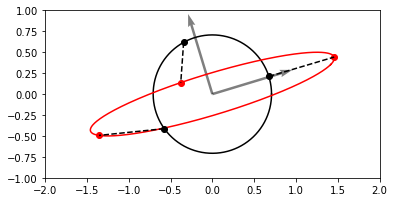

In [3]:
import numpy as np
import matplotlib.pyplot as plt


theta = np.linspace(0, 2*np.pi, 500)
r = np.sqrt(0.5)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

D = np.array([[2, 0.5],
              [0.5, 0.5]])
ell = D @ np.array([x1, x2])

fig, ax = plt.subplots(1)

ax.plot(x1, x2, '-k')
ax.plot(ell[0, :], ell[1, :], '-r')

for i in [24, 165, 299]:
    ax.plot(x1[i], x2[i], 'ko', zorder=10)
    ax.plot(ell[0, i], ell[1, i], 'ro')
    ax.plot([x1[i], ell[0, i]], [x2[i], ell[1, i]], '--k')

ax.quiver(0.95709203, 0.28978415, scale=4, alpha=0.5)
ax.quiver(-0.28978415, 0.95709203, scale=4, alpha=0.5)

ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)
ax.set_aspect(1)
plt.show()

The vectors now map an ellipse! Some vectors got rotated and squished, while some got rotated and elongated (scaled). However, there are some vectors which only got scaled and did not get rotated. These vectors are in the direction of the eigenvectors (grey arrows).

## Characteristic polynomial

How do we actually find eigenvectors and eigenvalues? Let us consider a general square matrix $A \in \mathbb{C}^{n \times n}$ with eigenvectors $\mathbf{x} \in \mathbb{C}^n$ and eigenvalues $\lambda \in \mathbb{C}$ such that:

$$ A \mathbf{x} = \lambda \mathbf{x}. $$

After subtracting the right hand side:

$$ A \mathbf{x} - \lambda \mathbf{x} = \mathbf{0}$$
$$ (A -\lambda I) \mathbf{x} = \mathbf{0} $$

Therefore, we are solving a homogeneous system of linear equations, but we want to find non-trivial solutions (\\( \mathbf{x} \neq \mathbf{0} \\)). Recall from the section on null spaces that a homogeneous system will have non-zero solutions iff the matrix of the system is singular, i.e.

$$ \det(A - \lambda I) = 0. $$

This is a polynomial of degree $n$ with roots $\lambda_1, \lambda_2, \dots, \lambda_k$, $k \leq n$. This polynomial is termed the **characteristic polynomial** of $A$, where the roots of the polynomial are the eigenvalues. The eigenvectors are then found by plugging each eigenvalue back in \\( (A -\lambda I) \mathbf{x} = \mathbf{0} \\) and solving it.

### Example

Let us find the eigenvalues and eigenvectors of the following matrix $A \in \mathbb{R}^{3 \times 3}$:

$$ A = \begin{pmatrix} 2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2 \end{pmatrix} $$

The characteristic polynomial is:

$$ \det (A - \lambda I) = 
\left | \begin{array}{ccc} 2 - \lambda & 1 & 0 \\ 1 & 2 - \lambda & 1 \\ 0 & 1 & 2 - \lambda \end{array} \right | \\
= (2 - \lambda)[(2-\lambda)^2 - 1] - 1 \\
= - \lambda^3 + 6 \lambda^2 - 10 \lambda + 4 
= (2 - \lambda)(\lambda^2 - 4\lambda + 2) = 0$$

The roots of this polynomial, which are the eigenvalues, are //( \lambda_{1, 2, 3} = 2, 2 \pm \sqrt{2} //). Now to find the eigenvectors we need to plug these values into $(A - \lambda I)\mathbf{x} = 0$.

Consider first $\lambda = 2$:

$$ (A - \lambda I)\mathbf{x} =
\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix},$$

where $x_1$, $x_2$ and $x_3$ are entries of the eigenvector $\mathbf{x}$. The solution may be obvious to some, but let us calculate it by solving this system of linear equations. Let us write it with an augmented matrix and reduce it to RREF by swapping the 1st and 2nd row and subtracting the 1st row (2nd after swapping) from the last row:

$$ \left ( \begin{array}{ccc|c} 0 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{array} \right ) \longrightarrow \left ( \begin{array}{ccc|c} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{array} \right ). $$

As expected, there is no unique solution because we required before that $(A - \lambda I) $ is singular. Therefore, we can parameterise the first equation: $x_1 = -x_3$ in terms of the free variable $x_3 = t, t \in \mathbb{R}$. We read from the second equation that $x_2 = 0$. The solution set is then $ \{ (-t, 0, t)^T, t \in \mathbb{R} \}$. If we let $t = 1$ then the eigenvector $\mathbf{x}_1$ corresponding to eigenvalue $ \lambda_1 = 2$ is $\mathbf{x}_1 = (-1, 0, 1)^T$. We do this because we only care about the direction of the eigenvector and can scale it arbitrarily.

We leave it to the readers to convince themselves that the other two eigenvectors are $(1, \sqrt{2}, 1)^T $ and $ (1, -\sqrt{2}, 1)^T $.

### Example: Algebraic and geometric multiplicity

```{index} Algebraic multiplicity
```

```{index} Geometric multiplicity
```

Now consider a matrix:

$$ A = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix} \Rightarrow
A - \lambda I = \begin{pmatrix} 1-\lambda & 0 & 0 \\ 0 & 1-\lambda & 0 \\ 0 & 0 & -1 - \lambda \end{pmatrix}. $$

The characteristic equation is \\(\det(A - \lambda I) = (\lambda - 1)(\lambda - 1)(\lambda + 1) = (\lambda - 1)^2(\lambda + 1) = 0 \\).

We see that the eigenvalues are $\lambda_1 = 1, \lambda_2 = -1$, where $\lambda_1$ is repeated twice. We therefore say that the **algebraic multiplicity**, which is the number of how many times an eigenvalue is repeated, of $\lambda_1$ is 2 and of $\lambda_2$ it is 1.

Let us now find the eigenvectors corresponding to these eigenvalues. For $\lambda_1 = 1$:

$$ (A - I)\mathbf{x} = \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -2 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $$

The only constraint on our eigenvector is that $x_3 = 0$, whereas there are no constraints on $x_1$ and $x_2$ - they can be whatever we want. In cases like this, we still try to define as many linearly independent eigenvectors as possible, which does not have to be equal to the algebraic multiplicity of an eigenvalue. In our case, we can easily define two linearly independent vectors by choosing $x_1=1, x_2=0$ for one vector and $x_1=0, x_2=1$ for the other. Therefore, we managed to get two linearly independent eigenvectors corresponding to the same eigenvalue:

$$ \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}. $$

The number of linearly independent eigenvectors corresponding to an eigenvalue $\lambda$ is called the **geometric multiplicity** of that eigenvalue. The algebraic multiplicity of $\lambda$ is equal or greater than its geometric multiplicity. An eigenvalue for which algebraic multiplicity $>$ geometric multiplicity is called, rather harshly, a *defective* eigenvalue.

Now consider the non-repeated eigenvalue $\lambda_2 = -1$:

$$ (A - I)\mathbf{x} = \begin{pmatrix} -2 & 0 & 0 \\ 0 & -2 & 0 \\ 0 & 0 & 0 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}. $$

We have $x_1 = 0, x_2 = 0$ and there is no constraint on $x_3$, so now $x_3$ can be any number we want. For simplicity we choose it to be 1. Then the eigenvector is simply

$$ \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} $$

and we conclude that the geometric multiplicity of $\lambda_2$ is 1.

Finally, we check if our findings agree with that of NumPy in Python:

In [126]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, -1]])

evals, evecs = np.linalg.eig(A)

print('A = \n', A)
print('Eigenvalues:', evals)
print('Eigenvectors: \n', evecs)

A = 
 [[ 1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
Eigenvalues: [ 1.  1. -1.]
Eigenvectors: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Example: Fibonacci numbers

The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number), often denoted by $F_n$, form a *Fibonacci sequence* where each number is the sum of the two preceding numbers. Let us write the beginning of that sequence, starting from 0 and 1:

$$ 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, \dots $$

We can express this with the help of a Fibonacci matrix:

$$ \begin{pmatrix} F_n \\ F_{n-1} \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} F_{n-1} \\ F_{n-2} \end{pmatrix}.$$

This is a normal system of equations where the first one is what we are after $ F_n = F_{n-1} + F_{n-2} $ and the second one is trivial $F_{n-1} = F_{n-1}$. Let us plot some of these points $(F_n, F_{n-1})$:

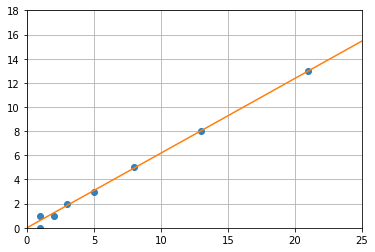

In [6]:
points = np.array([[1, 0], [1, 1], [2, 1], [3, 2], [5, 3], [8, 5], [13, 8], [21, 13]])

plt.plot(points[:, 0], points[:, 1], 'o', alpha=0.9)
plt.plot([0, 46368], [0, 28657])
plt.xlim(0, 25)
plt.ylim(0, 18)
plt.grid(True)
plt.show()

It looks like these points plot very closely onto the line which we also plotted in the figure. As it turns out, that line is an eigenvector of the Fibonacci matrix. The eigenvalue corresponding to that eigenvector is $\approx 1.618034$, the *golden ratio*.

What that means is that each point on that line will get scaled by the golden ratio further along that line. For the first several elements of our sequence this will not be entirely precise because they do not lie exactly on that line. However, for $F_n$ where $n \to \infty$, this error goes to zero. Therefore, given a very large element in the Fibonacci sequence, say 196418, we can find the next term by multiplying it by the golden ratio: $196418 \cdot 1.618034 = 317811.002$. Indeed, the next element is $317811$.

But what if we do not start our sequence from 0 and 1? Our findings would still be the same, because the eigenvalues and eigenvectors are properties of our operator, in this case the Fibonacci matrix. So no matter how we start our sequence, the elements of that sequence will be spaced out by the eigenvalue along the eigenvector line. Let us quickly show this for a selection of different points which will all move closer onto the eigenvector after each transformation:

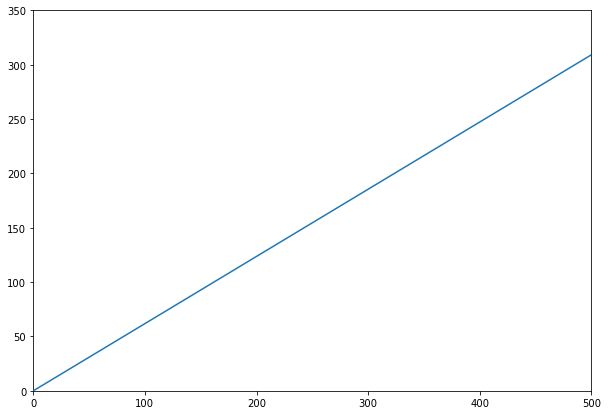

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


def init():
    point.set_data([], [])
    return point,

def update_plot(i):
    global points
    if i > 0:
        points = A @ points
    point.set_data(points[0, :], points[1, :])
    return point,


x = np.linspace(0, 100, 20)
x[0] += 0.001
y = np.linspace(0, 100, 20)
X, Y = np.meshgrid(x, y)

points = []

for i in range(len(X)):
    for j in range(len(X)):
        if Y[i, j] / X[i, j] <= 1:
            points.append([X[i, j], Y[i, j]])
            
points = np.array(points).T

A = np.array([[1, 1],
              [1, 0]])

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(xlim=(0, 500), ylim=(0, 350))
ax.plot([0, 46368], [0, 28657], zorder=10)
point, = ax.plot([], [], 'o', alpha = 0.9)

anim = FuncAnimation(fig, update_plot, init_func=init, frames=7, interval=1000, blit=True)
plt.show()

# anim.save('fibonacci.mp4', writer='ffmpeg')

```{figure} linalgdata/fibonacci.gif
---
name: fibonacci
---
Transformation matrix
```

# Invariants

```{index} Trace
```

```{index} Invariants
```

Consider the characteristic equation of a general $3 \times 3$ matrix:

$$ \det(A - \lambda I) = 
\det \begin{bmatrix} a_{11} - \lambda & a_{12} & a_{13} \\ a_{21} & a_{22} - \lambda & a_{23} \\ a_{31} & a_{32} & a_{33} - \lambda \end{bmatrix} = 0.$$

It turns out that the determinant of the matrix of the operator does not depend on the choice of basis (see Cauchy-Binet theorem below), so we call it the determinant of the operator. 

After evaluating the determinant, we could arrange our terms to get the following cubic characteristic equation:

$$ \lambda^3 - I_A \lambda^2 + II_A \lambda - III_A = 0, $$

where $I_A, II_A, III_A$ are defined as:

$$ \begin{align}
& I_A = tr A \\
& II_A = \frac{1}{2} \{ (tr A)^2 - tr(A^2) \} \\
& III_A = \det A.
\end{align} $$

$tr A$ is called the *trace* of $A$ and it is the sum of diagonal entries: //( tr A = a_{11} + a_{22} + a_{33} \\). There are three roots (eigenvalues) of the characteristic equation, for which we can also find that:

$$ \begin{align}
& I_A = \lambda_1 + \lambda_2 + \lambda_3 \\
& II_A = \lambda_1 \lambda_2 + \lambda_2 \lambda_3 + \lambda_3 \lambda_1 \\
& III_A = \lambda_1 \lambda_2 \lambda_3.
\end{align} $$

The spectrum of a matrix is invariant to the change of basis, so we conclude that $I, II$ and $III$ are also invariants. We call them the principal tensor invariants.

```{note} The characteristic polynomial does not depend on the choice of basis in which we consider the matrix of an operator. See the Cauchy-Binet theorem below.
```

## Example

Let us use the above to find the eigenvalues of \\( A = \begin{pmatrix} 1 & 4 \\ 3 & 5 \end{pmatrix}\\). We know that:

$$ \begin{align}
& I_A = tr A = 1 + 5 = \lambda_1 + \lambda_2 \\
& III_A = \det A = 1 \cdot 5 - 3 \cdot 4 = \lambda_1 \lambda_2.
\end{align} $$

This is a system of two equations and two unknowns which we can easily solve to find that the eigenvalues are $\lambda_{1, 2} = -1, 7$.

# Similar matrices

Let $P$ be an invertible $n \times n$ matrix and $A, B$ also $n \times n$ matrices such that:

$$ B = P^{-1}AP. $$

Then we say that $A$ and $B$ are **similar**, where $P$ is simply a change of basis matrix. The matrices are not "similar" in the usual sense - they could look completely different, but they share some useful properties. Perhaps most notably, similar matrices have the same characteristic polynomial, meaning that their determinants, traces and eigenvalues are also the same. We say that they are *similarity invariants*. Let us show this.

[Cauchy-Binet theorem](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Binet_formula) states that for two square matrices $X$, $Y$:

$$ \det (XY) = \det X \cdot \det Y. $$

Now consider the characteristic polynomial of $B$:

$$ \begin{aligned} \det (B - \lambda I)
& = \det(P^{-1}AP - \lambda P^{-1}P) \\
& = \det(P^{-1}(A - \lambda I)P) \\
& = \det(P^{-1}) \det(A - \lambda I) \det P \\
& = \det(A - \lambda I)
\end{aligned}$$

Therefore, $A$ and $B$ have the same characteristic polynomial, so their eigenvalues must be equal as well. Note that two matrices with the same set of eigenvalues are in general *not* similar matrices.

## Motivation

Finding eigenvalues of a matrix is a problem of finding the roots of its characteristic polynomial. This works well for small matrices, but Galois theory states that there is no general solution for polynomials of degree 5 or higher. So we need to find other methods of finding eigenvalues and these methods cannot be exact - they must be iterative.

Recall that the eigenvalues of a triangular matrix (including diagonal matrices) are the diagonal entries, so we can simply read the eigenvalues from them. For example, [Schur decomposition](https://en.wikipedia.org/wiki/Schur_decomposition) expresses $A \in \mathbb{C}^{n \times n}$ as:

$$ A = QUQ^{-1},$$

where $Q$ is a unitary matrix and $U$ is upper triangular. Since this is a similarity transformation, $A$ and $U$ have the same eigenvalues which are the diagonal entries of $U$ since $U$ is triangular. 